## Breast Cancer Prediction using DecisionTree classifier,Random forest classifier Support Vector Machine Algorithm in Python

In [85]:
#Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
breast_cancer = pd.read_csv('wisc_bc_data-1 (1).csv')

In [55]:
breast_cancer.head(10)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         B        12.32         12.39           78.85      464.1   
1         B        10.60         18.95           69.28      346.4   
2         B        11.04         16.83           70.92      373.2   
3         B        11.28         13.39           73.00      384.8   
4         B        15.19         13.21           97.65      711.8   
5         B        11.57         19.04           74.20      409.7   
6         B        11.51         23.93           74.52      403.5   
7         M        13.81         23.75           91.56      597.8   
8         B        10.49         19.29           67.41      336.1   
9         B        11.06         14.96           71.49      373.9   

   smoothness_mean  compactness_mean  concavity_mean  points_mean  \
0          0.10280           0.06981         0.03987      0.03700   
1          0.09688           0.11470         0.06387      0.02642   
2          0.10770           0.07804         0.03046      0.02480   
3          0.11640           0.11360         0.04635      0.04796   
4          0.07963           0.06934         0.03393      0.02657   
5          0.08546           0.07722         0.05485      0.01428   
6          0.09261           0.10210         0.11120      0.04105   
7          0.13230           0.17680         0.15580      0.09176   
8          0.09989           0.08578         0.02995      0.01201   
9          0.10330           0.09097         0.05397      0.03341   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.1959  ...         13.50          15.64            86.97   
1         0.1922  ...         11.88          22.94            78.28   
2         0.1714  ...         12.41          26.44            79.93   
3         0.1771  ...         11.92          15.77            76.53   
4         0.1721  ...         16.20          15.73           104.50   
5         0.2031  ...         13.07          26.98            86.43   
6         0.1388  ...         12.48          37.16            82.28   
7         0.2251  ...         19.20          41.85           128.50   
8         0.2217  ...         11.54          23.31            74.22   
9         0.1776  ...         11.92          19.90            79.76   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0       549.1            0.1385             0.1266          0.12420   
1       424.8            0.1213             0.2515          0.19160   
2       471.4            0.1369             0.1482          0.10670   
3       434.0            0.1367             0.1822          0.08669   
4       819.1            0.1126             0.1737          0.13620   
5       520.5            0.1249             0.1937          0.25600   
6       474.2            0.1298             0.2517          0.36300   
7      1153.0            0.2226             0.5209          0.46460   
8       402.8            0.1219             0.1486          0.07987   
9       440.0            0.1418             0.2210          0.22990   

   points_worst  symmetry_worst  dimension_worst  
0       0.09391          0.2827          0.06771  
1       0.07926          0.2940          0.07587  
2       0.07431          0.2998          0.07881  
3       0.08611          0.2102          0.06784  
4       0.08178          0.2487          0.06766  
5       0.06664          0.3035          0.08284  
6       0.09653          0.2112          0.08732  
7       0.20130          0.4432          0.10860  
8       0.03203          0.2826          0.07552  
9       0.10750          0.3301          0.09080  

[10 rows x 31 columns]

In [68]:
#Number of observations and Features

breast_cancer.shape

(569, 31)

In [67]:
#Datatype of each feature

breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis            569 non-null object
radius_mean          569 non-null float64
texture_mean         569 non-null float64
perimeter_mean       569 non-null float64
area_mean            569 non-null float64
smoothness_mean      569 non-null float64
compactness_mean     569 non-null float64
concavity_mean       569 non-null float64
points_mean          569 non-null float64
symmetry_mean        569 non-null float64
dimension_mean       569 non-null float64
radius_se            569 non-null float64
texture_se           569 non-null float64
perimeter_se         569 non-null float64
area_se              569 non-null float64
smoothness_se        569 non-null float64
compactness_se       569 non-null float64
concavity_se         569 non-null float64
points_se            569 non-null float64
symmetry_se          569 non-null float64
dimension_se         569 non-null float64
radius_worst  

**Seaborn Diagnosis Countplot The seaborn package provides a function called color_palette() that allows discrete color palettes. This will provide an interface to generate colors in seaborn, but also provide Hex color codes to your liking. In this example, we will provide the Hex color codes of #FF1493 (deep pink) and #FF69B4 (hot pink).**


In [70]:

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

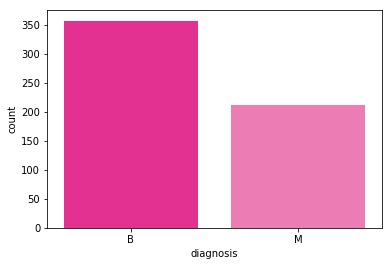

In [71]:
sns.countplot(breast_cancer['diagnosis'], label="Count", palette=sns.color_palette(['#FF1493', '#FF69B4']),
              order=pd.value_counts(breast_cancer['diagnosis']).iloc[:17].index)
plt.show()

**Seaborn Correlation Heatmap Matrix
A heatmap is a two-dimensional graphical representation of data values that are contained in a visualized matrix.**

**The seaborn Python package allows the creation of heatmaps which can be tweaked using matplotlib tools. For this example, we will be using the matplotlibs ListedColormap to customize the colors of the heatmap**

### Use correlation method to observe the relationship between different variables.

In [75]:
#breast_cancer = breast_cancer.drop('id', axis=1)
 
breast_cancer_corr = breast_cancer.corr()
 
print(breast_cancer_corr)

                   radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean           1.000000      0.323782        0.997855   0.987357   
texture_mean          0.323782      1.000000        0.329533   0.321086   
perimeter_mean        0.997855      0.329533        1.000000   0.986507   
area_mean             0.987357      0.321086        0.986507   1.000000   
smoothness_mean       0.170581     -0.023389        0.207278   0.177028   
compactness_mean      0.506124      0.236702        0.556936   0.498502   
concavity_mean        0.676764      0.302418        0.716136   0.685983   
points_mean           0.822529      0.293464        0.850977   0.823269   
symmetry_mean         0.147741      0.071401        0.183027   0.151293   
dimension_mean       -0.311631     -0.076437       -0.261477  -0.283110   
radius_se             0.679090      0.275869        0.691765   0.732562   
texture_se           -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se          0.6

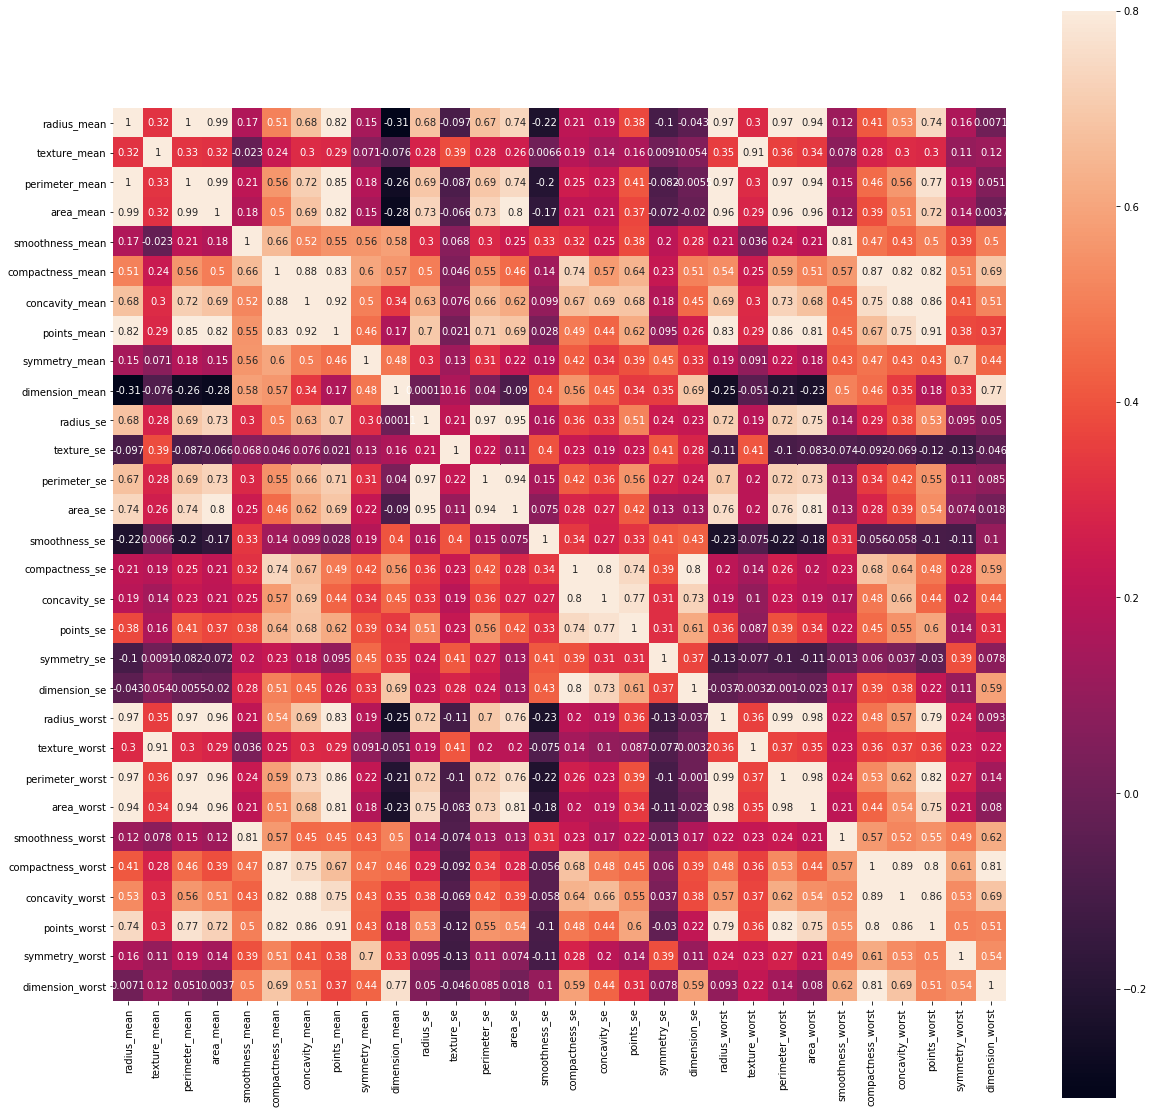

In [81]:
#correlation Matrix and Heatmap 

fig = plt.figure(figsize=(20,20))
sns.heatmap(breast_cancer_corr,annot = True ,vmax = 0.8,square = True)
plt.show()

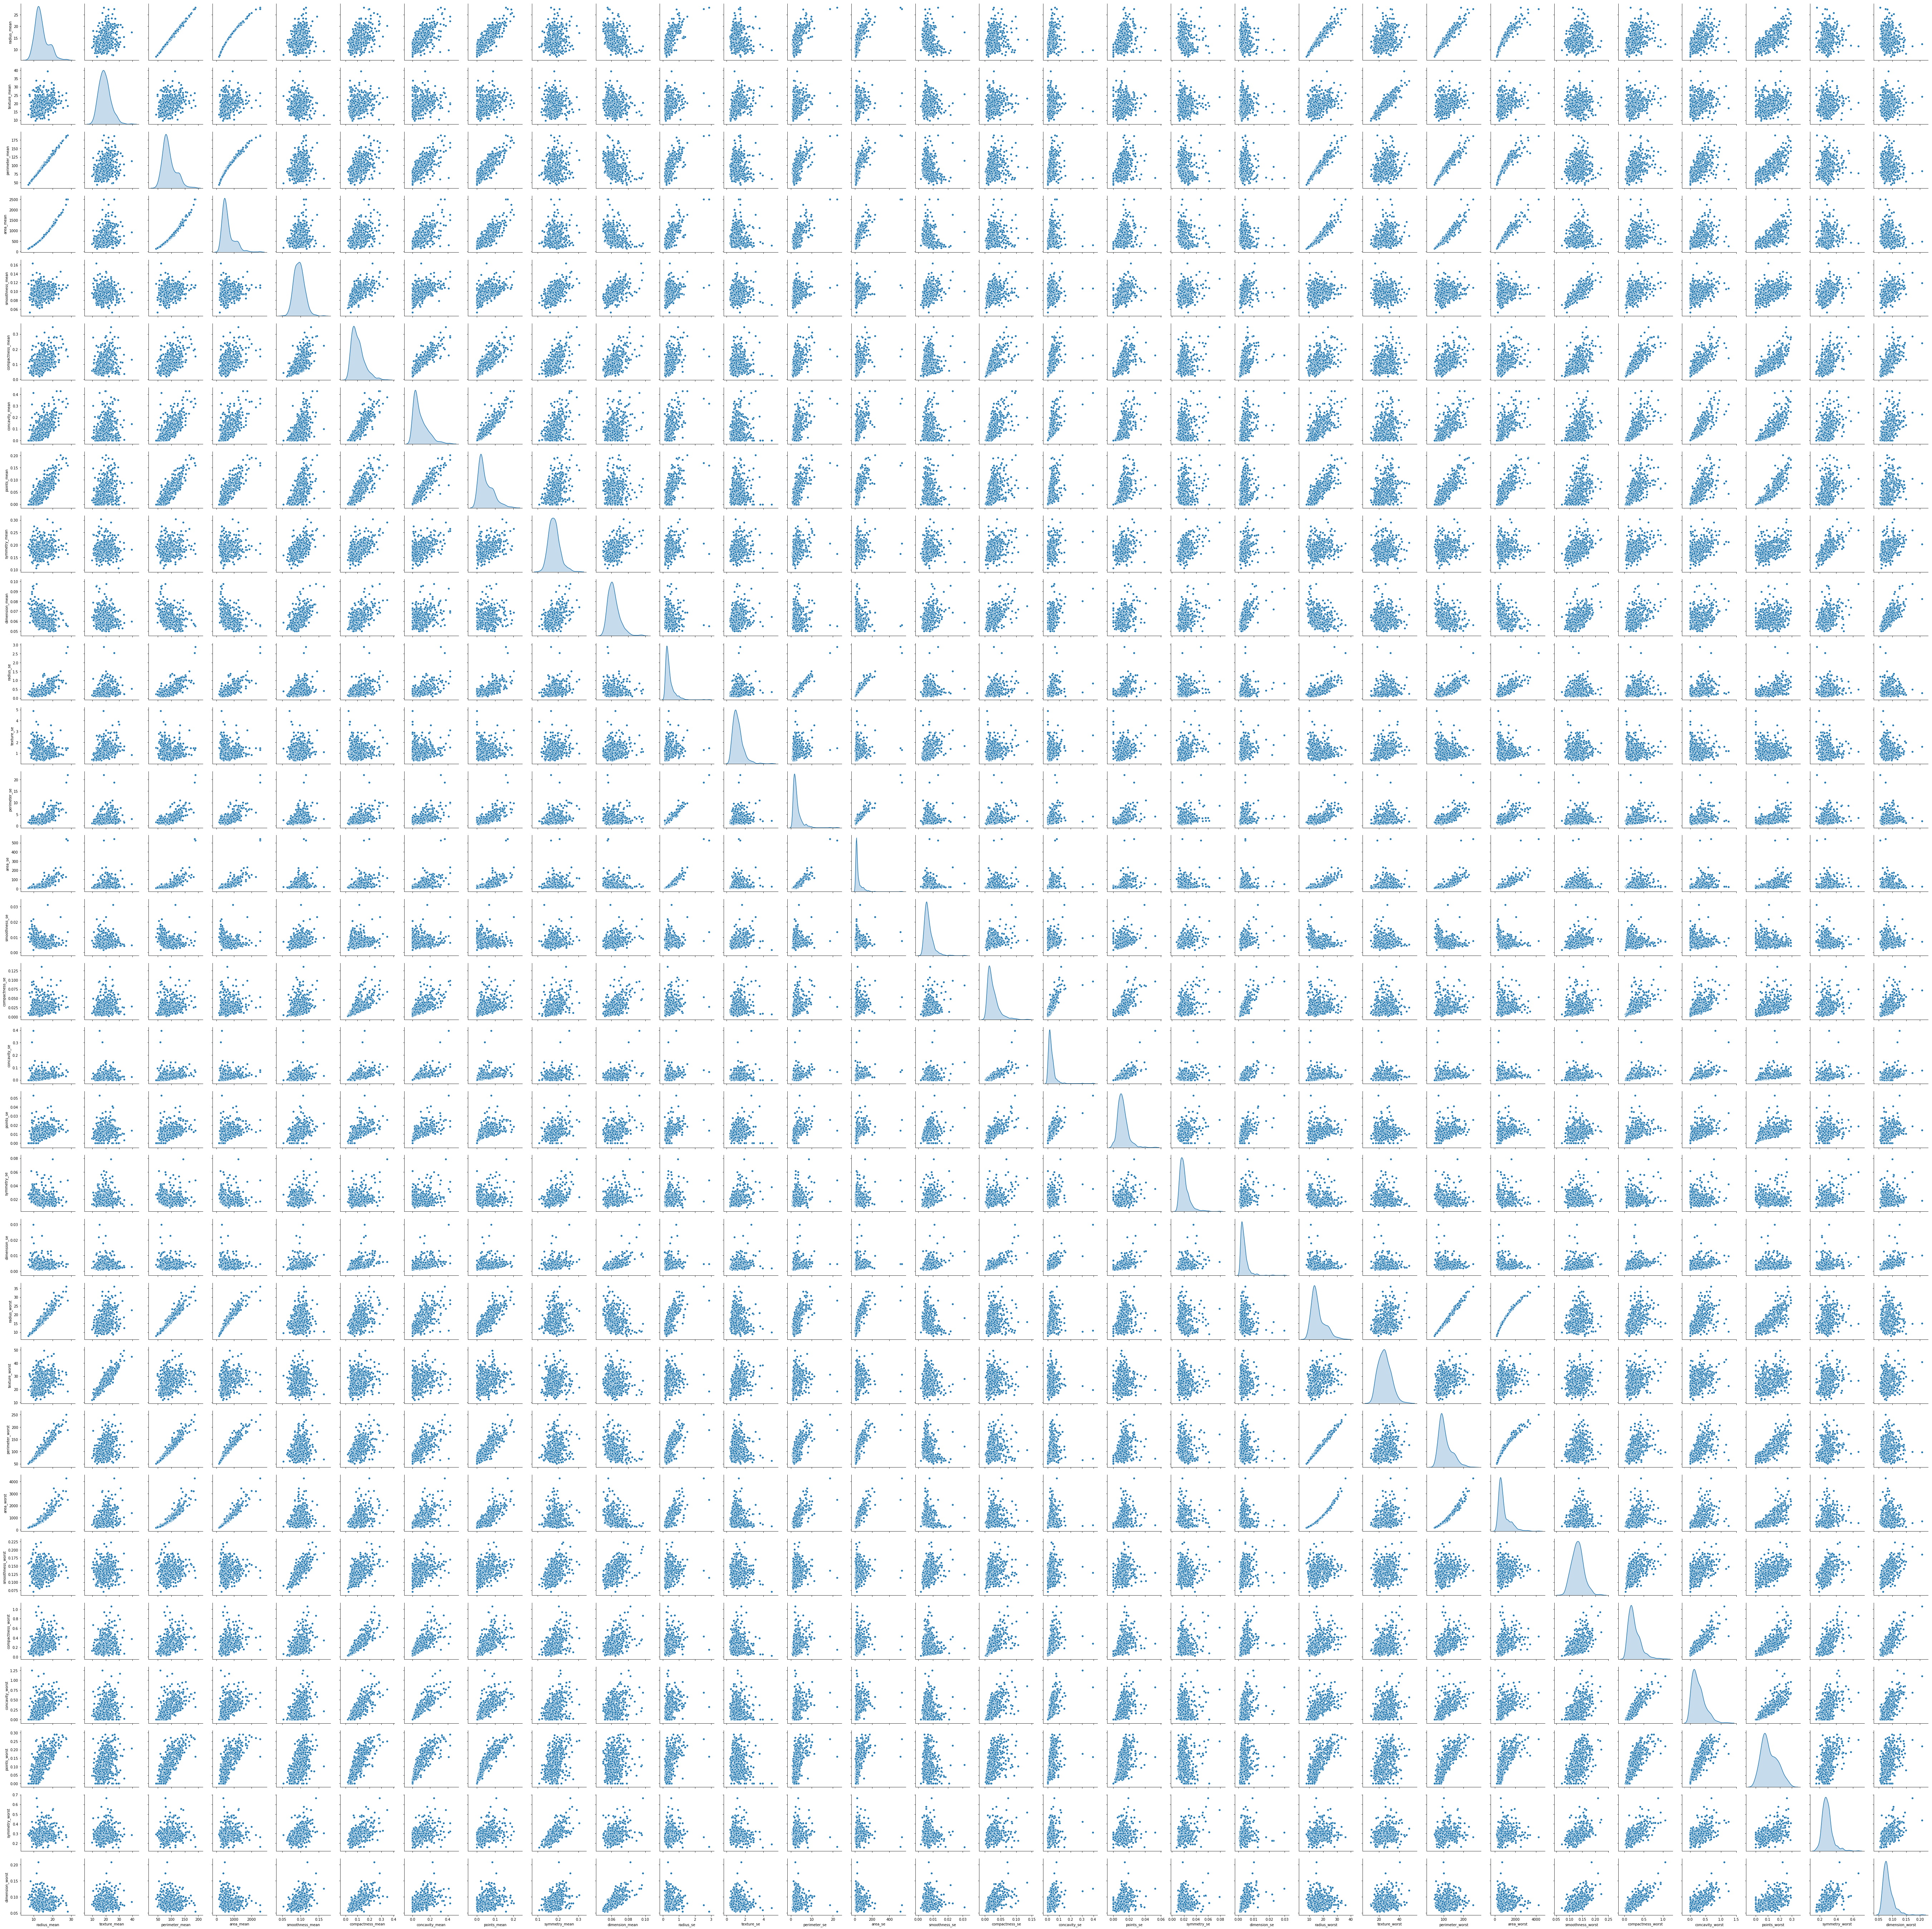

In [82]:
#One more multivariate analysis,here pairplot is used.

sns.pairplot(breast_cancer,diag_kind ='kde')

**Highest Correlation Breast Cancer Features
In order to plot the next few plots, we must be able to analyze which features have the highest correlation.**

**The breast_cancer_corr data frame has 30 rows and 30 columns. This means when we sort the features with the highest correlation, the dataframe output will have have 900 rows.**

**breast_cancer_corr.abs()
The abs() function is used to return the absolute value of a number.**

**high_correlation.unstack()
The unstack() function in a dataframe unstacks the row to columns.**

**high_correlation_unstack.sort_values(ascending=False)**
**The sort.values() function will sort the values in ascending or descending order. Also, we will print the high correlation between 30 and 35 because the first the 29 values will have a correlation of 1.000000.**


In [84]:
high_correlation = breast_cancer_corr.abs()
high_correlation_unstack = high_correlation.unstack()
high_correlation_sort = high_correlation_unstack.sort_values(ascending=False)
 
print(high_correlation_sort[30:35])

radius_mean      perimeter_mean     0.997855
perimeter_mean   radius_mean        0.997855
radius_worst     perimeter_worst    0.993708
perimeter_worst  radius_worst       0.993708
radius_mean      area_mean          0.987357
dtype: float64


### Train and Test Data
Before we can create the training and test data, we must remove the ‘id’ column. This column provides no value on the prediction on breast cancer and can be removed with the del function from pandas.

In [57]:
breast_cancer =  breast_cancer.drop('id',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.loc[:, breast_cancer.columns != 'diagnosis'],
                                                    breast_cancer['diagnosis'],stratify=breast_cancer['diagnosis'],random_state=66)

### Build the Decision Tree Classifier Model

In [58]:

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
 
print(f"Decision tree training set accuracy: {format(tree.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(tree.score(X_test, y_test), '.4f')}")

Decision tree training set accuracy: 1.0000 
Decision tree testing set accuracy: 0.9510


As one can see from the training set, the accuracy score is 1.0000 which is an indicator of over-fitting.

### Decision Tree Classifier Model Over-fitting
Over-fitting usually occurs when the learning system tightly fits the given training data so much that it would be inaccurate in predicting the outcomes of the untrained data. This is exactly what we can see with our training set data.

With our decision trees classifier model, over-fitting occurred when the tree is designed to perfectly fit all samples in the training data set. In return, we ended up with branches with strict rules of sparse data. This is why the training set data accuracy is effected when predicting samples that are not part of the training set.

### Decision Tree Pruning
One of the methods used to address over-fitting in decision tree is called pruning which is done after the initial training is complete. In pruning, you trim off the branches of the tree, which is completed by removing the decision nodes starting from the leaf node such that the overall accuracy is not disturbed.

### Decision Tree Classifier Improvement
In this DecisionTreeClassifier(), we will add the max_depth parameter which is optional. This parameter sets an integer to the maximum depth of the decision tree. If this left as None, the nodes will be expanded until all leaves are pure or until the leaves contain less than the than min_samples_split samples.

In [59]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
 
print(f"Decision tree training set accuracy: {format(tree.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(tree.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.9977 
Decision tree testing set accuracy: 0.9510 


**As we can see from the max_depth parameter with an integer of 5, we have an improved accuracy score on both the training and testing data.**

### Decision Tree Classifier Feature Importance
The DecisionTreeClassifier() has an attribute that returns the feature importance of each feature.

In [60]:

print(f"Breast Cancer Feature Importances: \n {format(tree.feature_importances_)} ")

Breast Cancer Feature Importances: 
 [0.         0.01736401 0.         0.         0.         0.
 0.00675267 0.01147954 0.         0.         0.00920819 0.0461134
 0.         0.00289261 0.00810321 0.         0.         0.
 0.00675267 0.00189743 0.70153487 0.05171036 0.         0.
 0.         0.         0.02198609 0.10653145 0.00767349 0.        ] 


### Decision Features Importance Plot

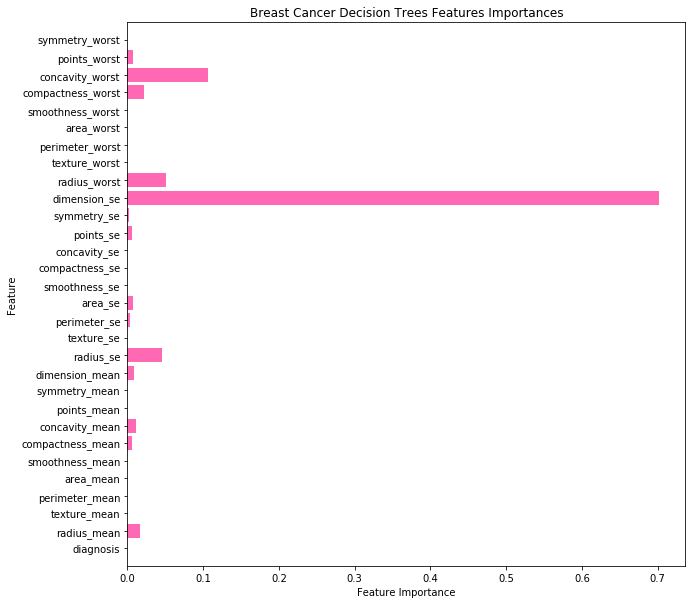

In [61]:

breast_cancer_features = [x for i,x in enumerate(breast_cancer.columns) if i!=30]
 
def breast_cancer_feature_importances_plot(model):
    plt.figure(figsize=(10,10))
    n_features = 30
    plt.barh(range(n_features), model.feature_importances_, align='center', color=['#FF69B4'])
    plt.yticks(np.arange(n_features), breast_cancer_features)
    plt.title('Breast Cancer Decision Trees Features Importances')
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
breast_cancer_feature_importances_plot(tree)
plt.show()

### Build the Random Forest Classifier Model
The RandomForestClassifier() from sklearn is a very simple model to build by adding a few parameters to reduce over-fitting. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset. In addition, uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [62]:

from sklearn.ensemble import RandomForestClassifier

In [63]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
print(f"Random forest training set accuracy: {format(forest.score(X_train, y_train), '.4f')} ")
print(f"Random forest testing set accuracy: {format(forest.score(X_test, y_test), '.4f')} ")


Random forest training set accuracy: 1.0000 
Random forest testing set accuracy: 0.9790 


**The random forest with 100 trees gives us an accuracy of 94.41% on the testing data but 100% on training set which is an indicator of over-fitting. We can implement the max_depth parameter that will set at 5.**

In [64]:
forest = RandomForestClassifier(max_depth=5, n_estimators=100)
forest.fit(X_train, y_train)
 
print(f"Random forest training set accuracy: {format(forest.score(X_train, y_train), '.4f')} ")
print(f"Random forest testing set accuracy: {format(forest.score(X_test, y_test), '.4f')} ")


Random forest training set accuracy: 0.9930 
Random forest testing set accuracy: 0.9860 


By adding the max depth of 5, we improved the training set accuracy to 99.30% and the testing set accuracy score from stayed the same at 94.41%.

### Random Forest Classifier Feature Importance
The RandomForestClassifier() has an attribute that returns the feature importance of each feature.

In [65]:
print(f"Breast Cancer Feature Importances: \n {format(forest.feature_importances_)} ")


Breast Cancer Feature Importances: 
 [0.04532871 0.01634724 0.03634385 0.0609214  0.00597137 0.01762763
 0.04544589 0.0851328  0.00328424 0.00245764 0.0181018  0.00521866
 0.00933987 0.05034568 0.0022239  0.00465388 0.00564667 0.00207298
 0.00422641 0.00669978 0.10651648 0.02821631 0.1413259  0.11417092
 0.01454809 0.01607156 0.02615676 0.11252    0.00687054 0.00621305] 


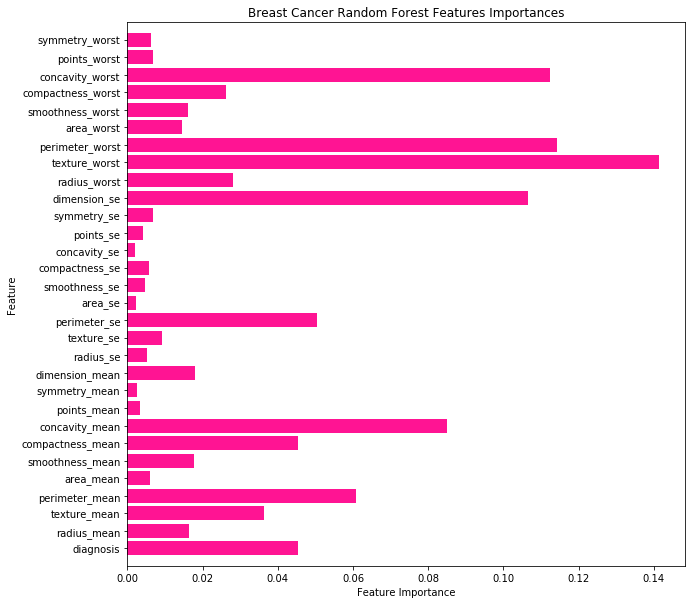

In [66]:
breast_cancer_features = [x for i,x in enumerate(breast_cancer.columns) if i!=30]
 
def breast_cancer_feature_importances_plot(model):
    plt.figure(figsize=(10,10))
    n_features = 30
    plt.barh(range(n_features), model.feature_importances_, align='center', color=['#FF1493'])
    plt.yticks(np.arange(n_features), breast_cancer_features)
    plt.title('Breast Cancer Random Forest Features Importances')
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
 
breast_cancer_feature_importances_plot(forest)
plt.show()

**Seaborn Diagnosis Countplot
The seaborn package provides a function called color_palette() that allows discrete color palettes. This will provide an interface to generate colors in seaborn, but also provide Hex color codes to your liking. In this example, we will provide the Hex color codes of #FF1493 (deep pink) and #FF69B4 (hot pink).**

### Support Vector Machine Model

A support vector machine will quickly analyze large amounts of data and can place that data into a group that changes over time. Support vector machines are used as part of a training set and are only helpful in supervised training settings. This algorithm is not designed to think in a completely unique way and to figure out relationships that were not previously present. It can more often be used to simply place information into one group or another much faster and more efficiently then an individual or another algorithm.
The support vector machines model will provide an effective high dimensional spaces even when the number of dimensions is greater than the number of samples.Also, the model will use a subset of training points in the decision function (called support vectors). By doing so, it provides better memory efficiency.



In [86]:
from sklearn.svm import SVC

**SVM MinMaxScaler**
The MinMaxScaler method transforms features by scaling each feature to a given range. Meaning this estimator scales and translates each feature individually such that it is in the given range on the training set.

In [87]:
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
 
vector = SVC()
vector.fit(X_train_scaled, y_train)
 
print(f"Support vector machine training set accuracy: {format(vector.score(X_train_scaled, y_train), '.4f')} ")
print(f"Support vector machine testing set accuracy: {format(vector.score(X_test_scaled, y_test), '.4f')} ")

C:\Users\amreen\newpy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support vector machine training set accuracy: 0.9437 
Support vector machine testing set accuracy: 0.9720 


**Thank you**